In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import numpy as np
import matplotlib.pyplot as plt

# DQN

In [60]:
from src.OED import OED, OEDGymConfig
from src.DQN import DQN_OED

from pde.AdvectionEquation import *
from pde.Burgers2D import *
from pde.AdvectionDiffusionReaction import *

## Advection Equation

In [61]:
seed = 0
adv_config = Adv2dModelConfig()
adv_eq = Advection2D(adv_config)

In [62]:
gym_config = OEDGymConfig()
adv_dqn = DQN_OED(seed, pde_system=adv_eq, gym_config=gym_config, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


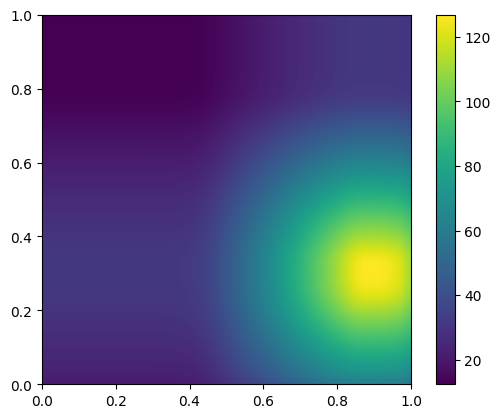

In [64]:
plt.imshow(adv_dqn.env.pde_field[:, :, -1].T, origin='lower', extent=[0, 1, 0, 1], interpolation='bilinear')
plt.colorbar()

In [65]:
model_name = "adv_dqn_1"
adv_dqn.train(model_name, total_timesteps=50000, log_interval=10)

Logging to ./tensorboard/DQN_17
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.4     |
|    ep_rew_mean      | -359     |
|    exploration_rate | 0.948    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 273      |
|    time_elapsed     | 1        |
|    total_timesteps  | 274      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13       |
|    n_updates        | 43       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.1     |
|    ep_rew_mean      | -315     |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 393      |
|    time_elapsed     | 1        |
|    total_timesteps  | 481      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             |

In [103]:
adr_all_ep_rewards, adr_best_rewards, adr_optimal_states_all = adv_dqn.evaluate(num_episodes=1000)

Starting episode 1/1000
  Step 1, Current reward: 0.038722
  Step 2, Current reward: 0.038722
  Step 3, Current reward: 0.038722
  Step 4, Current reward: 0.038722
  Step 5, Current reward: 0.038722
  Step 6, Current reward: 0.038722
  Step 7, Current reward: 0.038722
  Step 8, Current reward: 0.038722
  Step 9, Current reward: 0.038722
  Step 10, Current reward: 0.038722
  Step 11, Current reward: 0.038722
  Step 12, Current reward: 0.038722
Episode 1/1000 complete - Max Reward: 0.038722
Starting episode 2/1000
  Step 1, Current reward: 0.077097
  Step 2, Current reward: 0.077097
  Step 3, Current reward: 0.077097
  Step 4, Current reward: 0.077097
  Step 5, Current reward: 0.077097
  Step 6, Current reward: 0.077097
  Step 7, Current reward: 0.077097
  Step 8, Current reward: 0.077097
  Step 9, Current reward: 0.077097
  Step 10, Current reward: 0.077097
  Step 11, Current reward: 0.077097
  Step 12, Current reward: 0.077097
Episode 2/1000 complete - Max Reward: 0.077097
Starting epi

## Burgers Equation

In [96]:
seed = None
ib_config = Burgers2DConfig()
ib_eq = Burgers2D(ib_config)

In [100]:
gym_config = OEDGymConfig()
gym_config.n_sensor = 10
gym_config.n_components_rewards = 4
ib_dqn = DQN_OED(seed, pde_system=ib_eq, gym_config=gym_config, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [101]:
model_name = "ib_dqn_1"
ib_dqn.train(model_name, total_timesteps=50000, log_interval=100)

Logging to ./tensorboard/DQN_27
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.7     |
|    ep_rew_mean      | 0.455    |
|    exploration_rate | 0.588    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 949      |
|    time_elapsed     | 2        |
|    total_timesteps  | 2171     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00067  |
|    n_updates        | 517      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 0.277    |
|    exploration_rate | 0.143    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 841      |
|    time_elapsed     | 5        |
|    total_timesteps  | 4510     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             |

In [102]:
ib_all_ep_rewards, ib_best_rewards, ib_optimal_states_all = ib_dqn.evaluate(num_episodes=100)

Starting episode 1/100
  Step 1, Current reward: 0.038457
  Step 2, Current reward: 0.040669
  Step 3, Current reward: 0.051874
  Step 4, Current reward: 0.064399
  Step 5, Current reward: 0.075063
  Step 6, Current reward: 0.082071
  Step 7, Current reward: 0.084809
  Step 8, Current reward: 0.082127
  Step 9, Current reward: 0.080818
  Step 10, Current reward: 0.076626
  Step 11, Current reward: 0.091957
  Step 12, Current reward: 0.125208
  Step 13, Current reward: 0.116829
  Step 14, Current reward: 0.107123
  Step 15, Current reward: 0.097632
  Step 16, Current reward: 0.089347
  Step 17, Current reward: 0.089347
  Step 18, Current reward: 0.089347
  Step 19, Current reward: 0.089347
  Step 20, Current reward: 0.089347
  Step 21, Current reward: 0.089347
  Step 22, Current reward: 0.089347
  Step 23, Current reward: 0.089347
Episode 1/100 complete - Max Reward: 0.125208
Starting episode 2/100
  Step 1, Current reward: 0.000622
  Step 2, Current reward: 0.000622
  Step 3, Current r

## Advection Diffusion Reaction Equation

In [80]:
seed = 0
adr_config = ADRConfig()
adr_eq = ADR(adr_config)

In [87]:
gym_config = OEDGymConfig()
gym_config.n_sensor = 2

adr_dqn = DQN_OED(seed, pde_system=adr_eq, gym_config=gym_config, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [82]:
model_name = "adr_dqn_1"
adr_dqn.train(model_name, total_timesteps=5000, log_interval=100)

Logging to ./tensorboard/DQN_22
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | -inf     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 100      |
|    fps              | 756      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1766     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 47.6     |
|    n_updates        | 416      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | -inf     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 200      |
|    fps              | 710      |
|    time_elapsed     | 4        |
|    total_timesteps  | 3505     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             |

In [86]:
adr_dqn.env.modes.shape

(2500, 5)

In [84]:
adr_all_ep_rewards, adr_best_rewards, adr_optimal_states_all = adr_dqn.evaluate(num_episodes=100)

Starting episode 1/100
  Step 1, Current reward: -41.005670
  Step 2, Current reward: -40.732275
  Step 3, Current reward: -40.541639
  Step 4, Current reward: -40.431932
  Step 5, Current reward: -40.402407
  Step 6, Current reward: -40.453516
  Step 7, Current reward: -40.587195
  Step 8, Current reward: -40.807415
  Step 9, Current reward: -41.121207
  Step 10, Current reward: -41.540662
  Step 11, Current reward: -42.087122
  Step 12, Current reward: -42.801279
  Step 13, Current reward: -43.772962
  Step 14, Current reward: -45.268624
  Step 15, Current reward: -49.426770
  Step 16, Current reward: -46.616453
Episode 1/100 complete - Max Reward: -40.402407
Starting episode 2/100
  Step 1, Current reward: -49.024111
  Step 2, Current reward: -49.554146
  Step 3, Current reward: -50.165037
  Step 4, Current reward: -50.862308
  Step 5, Current reward: -51.654561
  Step 6, Current reward: -52.555369
  Step 7, Current reward: -53.587158
  Step 8, Current reward: -54.790270
  Step 9, C

## Plots

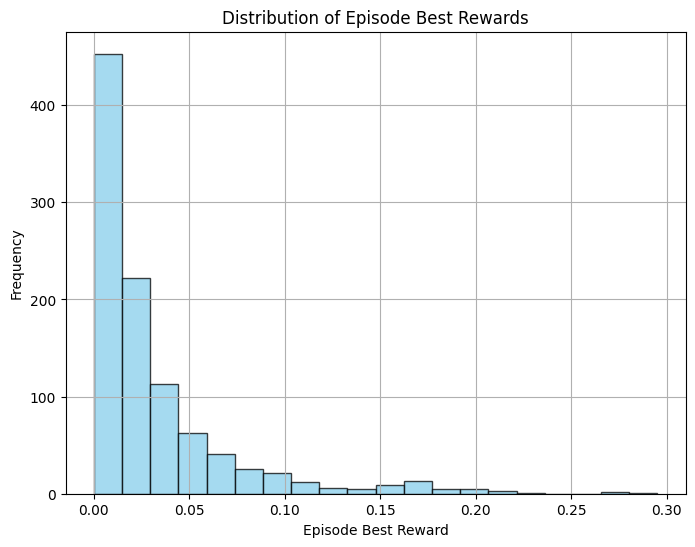

In [106]:
plt.figure(figsize=(8, 6))
plt.hist(adr_best_rewards, bins=20, color='skyblue', edgecolor='black', alpha=0.75)
plt.xlabel('Episode Best Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Best Rewards')
plt.grid(True)
plt.show()

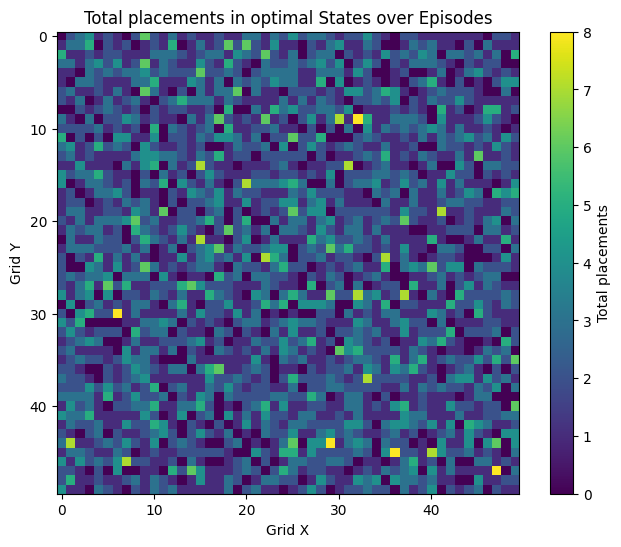

In [107]:
# Compute sum of optimal_states over all episodes
# Assumes that each info["optimal_states"] is a numpy array of the same shape
optimal_states_stack = np.array(adr_optimal_states_all)
mean_optimal_states = np.sum(optimal_states_stack, axis=0)

# Plot grid of mean optimal_states
plt.figure(figsize=(8, 6))
plt.imshow(mean_optimal_states, cmap='viridis', interpolation='nearest')
plt.title('Total placements in optimal States over Episodes')
plt.colorbar(label='Total placements')
plt.xlabel('Grid X')
plt.ylabel('Grid Y')
plt.show()